In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from time import strftime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

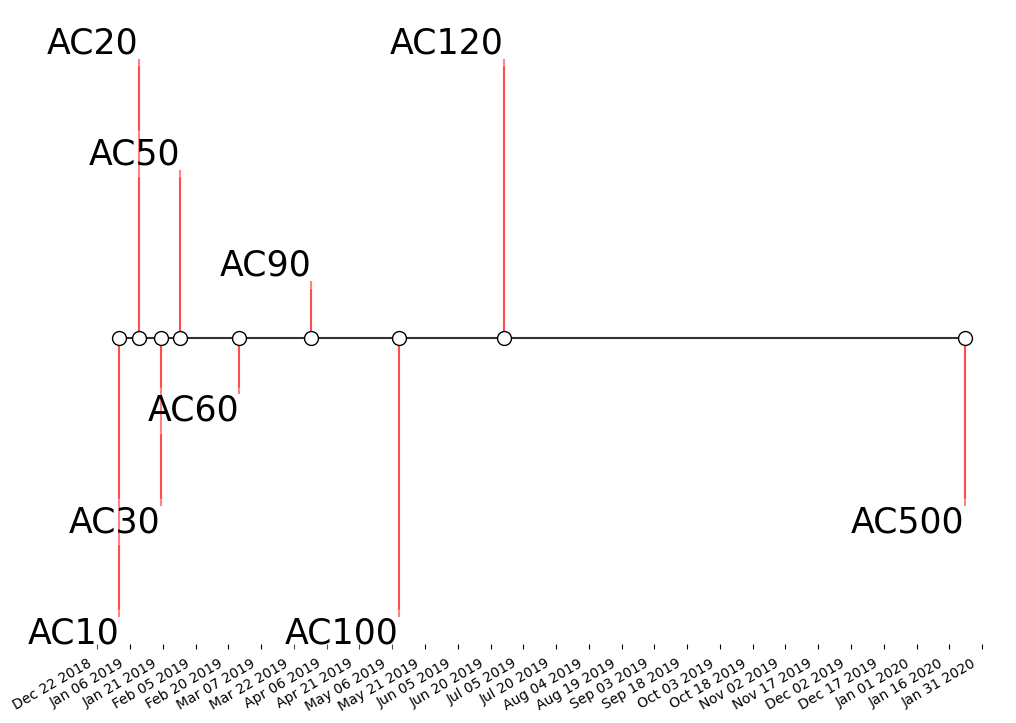

In [2]:
names = ['AC10','AC20','AC30','AC50','AC60','AC90','AC100','AC120','AC500']

dates = ['2019-01-01','2019-01-10','2019-01-20','2019-01-29','2019-02-25','2019-03-30','2019-05-09','2019-06-26','2020-01-23']
dates = [datetime.strptime(ii, "%Y-%m-%d") for ii in dates]

levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(12, 9))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.8)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=25,
            backgroundcolor=(1., 1., 1., .3))

    ax.set(title=" ")
ax.get_xaxis().set_major_locator(mdates.DayLocator(interval=15))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %d %Y "))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() + list(ax.spines.values())), visible=False)
plt.show()